### Project on Salary prediction using Linear Regression

# Employee Salary Dataset

## About Dataset

This dataset contains information about the salaries of employees at a hypothetical company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.

### Columns:

- **Age:** This column represents the age of each employee in years. The values in this column are numeric.

- **Gender:** This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.

- **Education Level:** This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.

- **Job Title:** This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.

- **Years of Experience:** This column represents the number of years of work experience of each employee. The values in this column are numeric.

- **Salary:** This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.

### Purpose and Source:

The purpose of creating this dataset is solely for educational use, and any commercial use is strictly prohibited. This dataset was generated using large language models and not collected from actual data sources.

### Source:

This dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer/data).

---

*Note: This dataset is fictional and created for educational purposes only.*


In [1]:
from pyforest import*
lazy_imports()

['from sklearn.ensemble import GradientBoostingClassifier',
 'import sys',
 'import statistics',
 'import re',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import fbprophet',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import lightgbm as lgb',
 'import sklearn',
 'import plotly.express as px',
 'from scipy import signal as sg',
 'import tqdm',
 'from pathlib import Path',
 'import spacy',
 'from sklearn.linear_model import Ridge',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import matplotlib as mpl',
 'import pickle',
 'import awswrangler as wr',
 'import xgboost as xgb',
 'from pyspark import SparkContext',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.model_selection import KFold',
 'import os',
 'import glob',
 'from sklearn.model_selection import cross_val_score',
 'from sklearn.cluster import KMeans',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from xl

In [2]:
df = pd.read_csv('/Users/mac/Downloads/Salary Data.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [6]:
# we find the rows that masked the missing values
mask_non_integer = pd.to_numeric(df['Age'], errors='coerce').isna()
# Display rows with non-integer values
rows_with_non_integer = df[mask_non_integer]
print("Rows with Non-Integer Values:")
print(rows_with_non_integer)

<IPython.core.display.Javascript object>

Rows with Non-Integer Values:
     Age Gender Education Level Job Title  Years of Experience  Salary
172  NaN    NaN             NaN       NaN                  NaN     NaN
260  NaN    NaN             NaN       NaN                  NaN     NaN


In [7]:
df = df.dropna(axis=0)


In [8]:
df['Gender'].value_counts()

Male      194
Female    179
Name: Gender, dtype: int64

In [9]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [10]:
#convert the Age,salary and years of experience to integers
df['Age'] = df['Age'].astype(int)
df['Salary']= df['Salary'].astype(int)
df['Years of Experience'] = df['Years of Experience'].astype(int)

In [11]:
df.dtypes

Age                     int64
Gender                 object
Education Level        object
Job Title              object
Years of Experience     int64
Salary                  int64
dtype: object

<IPython.core.display.Javascript object>

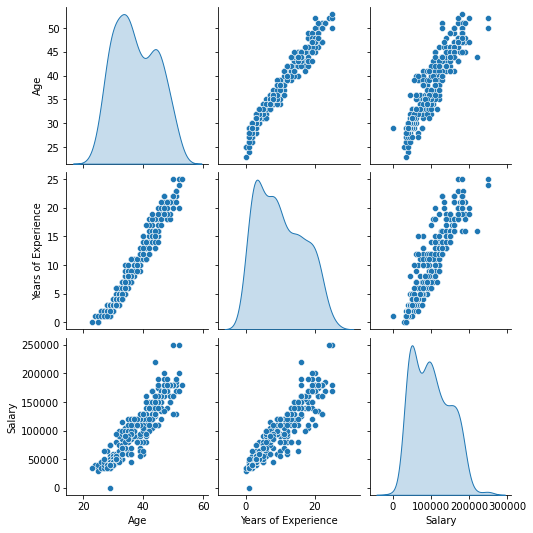

In [12]:
cData_attr = df.iloc[:,0:6]
sns.pairplot(cData_attr, diag_kind='kde')

<IPython.core.display.Javascript object>

<AxesSubplot:>

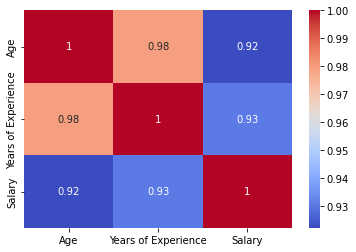

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

### OBSERVATION:
#### There is a very strong Relationship between age and Years of Experience
#### There Is also a very strong Relationship between Years of Experience and Salary
#### There is no relationship between Level of Education and Job Title

In [15]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [16]:
df = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Job Title'])
df.head()

<IPython.core.display.Javascript object>

,Age,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD,Job Title_Account Manager,Job Title_Accountant,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32,5,90000,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28,3,65000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45,15,150000,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36,7,60000,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52,20,200000,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split Data and Scale Data

In [17]:
X = df.drop(['Salary'],axis = 1)
y = df['Salary']

In [18]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

<IPython.core.display.Javascript object>

In [19]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Fit the Model

In [20]:
from sklearn.linear_model import Ridge
alpha = 1  # You can adjust the alpha parameter for the desired level of regularization
ridge_model = Ridge(alpha=alpha)

# Train the Ridge model
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = ridge_model.predict(X_test_scaled)



### Evaluation

Training Mean Squared Error: 36318633.117242865
Training R-squared: 0.9838625173879225

Testing Mean Squared Error: 283201322.2261277
Testing R-squared: 0.8860183531350512


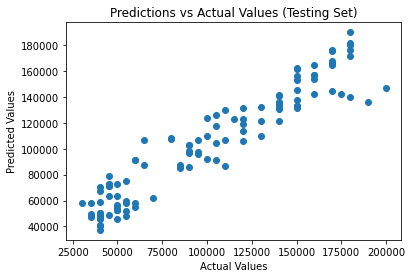

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
# Predictions on training set
y_train_pred = ridge_model.predict(X_train_scaled)

# Predictions on testing set
y_test_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model on training set
mse_train = mean_squared_error(y_train, y_train_pred)
r_squared_train = r2_score(y_train, y_train_pred)

# Evaluate the model on testing set
mse_test = mean_squared_error(y_test, y_test_pred)
r_squared_test = r2_score(y_test, y_test_pred)

print("Training Mean Squared Error:", mse_train)
print("Training R-squared:", r_squared_train)
print("\nTesting Mean Squared Error:", mse_test)
print("Testing R-squared:", r_squared_test)

# Plot predictions vs actual values for testing set
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs Actual Values (Testing Set)")
plt.show()


## Choosing the best Alpha

<IPython.core.display.Javascript object>

Optimal Alpha: 10.0


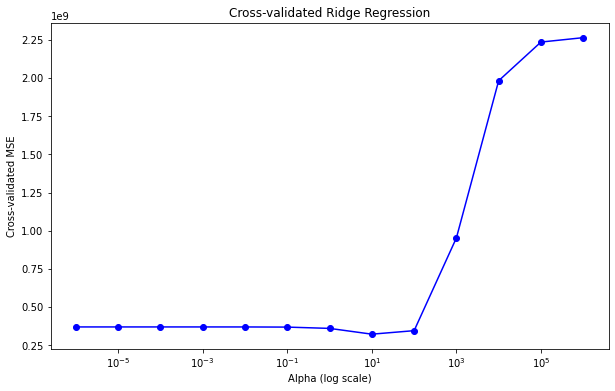

In [23]:
# Set up a range of alpha values to test
alphas = np.logspace(-6, 6, 13)

# Create RidgeCV model with cross-validation
ridge_cv_model = RidgeCV(alphas=alphas, store_cv_values=True)

# Fit the RidgeCV model
ridge_cv_model.fit(X_train_scaled, y_train)

# Get the optimal alpha value
optimal_alpha = ridge_cv_model.alpha_
print("Optimal Alpha:", optimal_alpha)

# Get the cross-validated MSE values for each alpha
cv_mse_values = np.mean(ridge_cv_model.cv_values_, axis=0)

# Plot cross-validated MSE values for each alpha
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(alphas, cv_mse_values, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Cross-validated MSE')
plt.title('Cross-validated Ridge Regression')
plt.show()


In [24]:
from sklearn.linear_model import Ridge
alpha = 10  # You can adjust the alpha parameter for the desired level of regularization
ridge_model_2 = Ridge(alpha=alpha)

# Train the Ridge model
ridge_model_2.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = ridge_model_2.predict(X_test_scaled)


Training Mean Squared Error: 36318633.117242865
Training R-squared: 0.9838625173879225

Testing Mean Squared Error: 241360431.0879787
Testing R-squared: 0.9028582945616498


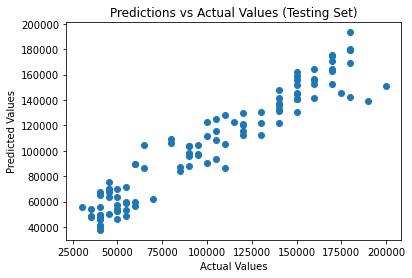

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Predictions on training set
y_train_pred_2 = ridge_model_2.predict(X_train_scaled)

# Predictions on testing set
y_test_pred = ridge_model_2.predict(X_test_scaled)

# Evaluate the model on training set
mse_train = mean_squared_error(y_train, y_train_pred)
r_squared_train = r2_score(y_train, y_train_pred)

# Evaluate the model on testing set
mse_test = mean_squared_error(y_test, y_test_pred)
r_squared_test = r2_score(y_test, y_test_pred)

print("Training Mean Squared Error:", mse_train)
print("Training R-squared:", r_squared_train)
print("\nTesting Mean Squared Error:", mse_test)
print("Testing R-squared:", r_squared_test)

# Plot predictions vs actual values for testing set
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs Actual Values (Testing Set)")
plt.show()
